# Question 4

- The three methods to detect a voiced or unvoiced frame: Energy, Zero crossing rate and autocorrelation

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
def zerocr(frame):
    zcr = np.mean(np.abs(np.diff(np.sign(frame))) / 2)
    return zcr

def energy(frame):
    energy = np.sum(frame ** 2) / len(frame)
    return energy

def autocorrelation(frame):
    autocorr = np.correlate(frame, frame, mode='full')
    return autocorr[len(autocorr) // 2] # this actually extracts the energy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


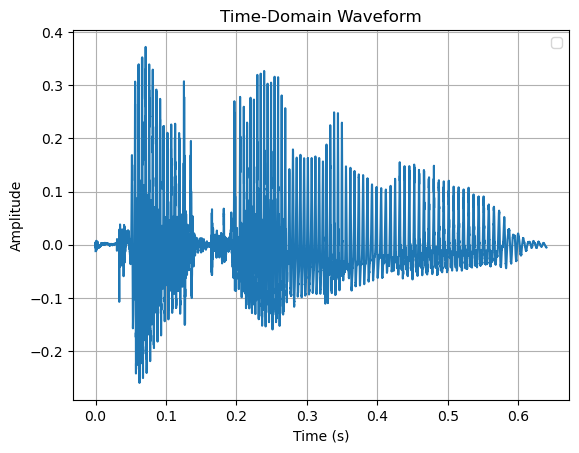

In [3]:
signal, sr = librosa.load("../audio/audio.wav", sr=None)
time = np.arange(len(signal)) / sr
plt.figure()
plt.plot(time, signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Waveform")
plt.grid(True)
plt.legend()
plt.show()

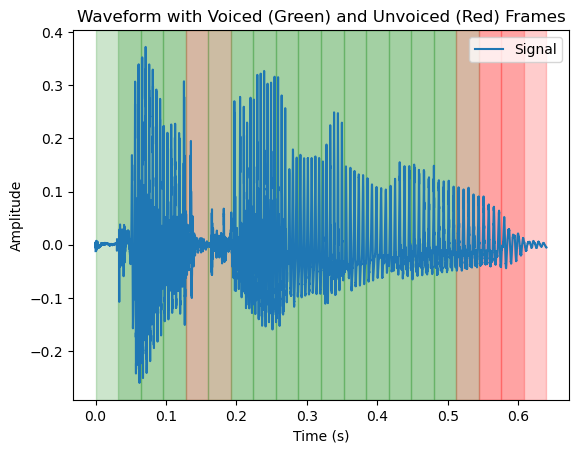

In [4]:
# using energy
windowSize = 1024 # frames
shiftSize = 512

num_frames = 1 + (len(signal) - windowSize) // shiftSize
voiced_unvoiced = []  # 1 for voiced, 0 for unvoiced
energy_values = []

for i in range(num_frames):
    start = i * shiftSize
    end = start + windowSize
    frame = signal[start:end]
    energy_val = energy(frame)
        
    energy_values.append(energy_val)
   
threshold = np.percentile(energy_values, 20)  # 20th percentile

for i in range(num_frames):
    if energy_values[i] > threshold:
        voiced_unvoiced.append(1)
    else:
        voiced_unvoiced.append(0)
        
        
plt.figure()
plt.plot(time, signal, label="Waveform")
for i, vu in enumerate(voiced_unvoiced):
    start_time = i * shiftSize / sr
    end_time = (i * shiftSize + windowSize) / sr
    color = 'green' if vu == 1 else 'red'
    plt.axvspan(start_time, end_time, color=color, alpha=0.2)
plt.title("Waveform with Voiced (Green) and Unvoiced (Red) Frames")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["Signal"])
plt.show()

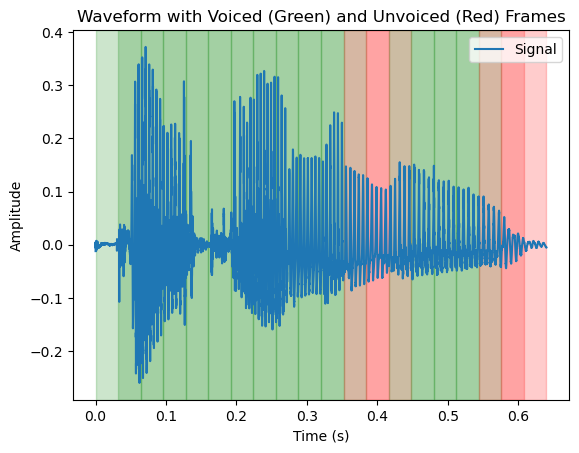

In [5]:
# using zcr
windowSize = 1024 # frames
shiftSize = 512

num_frames = 1 + (len(signal) - windowSize) // shiftSize
voiced_unvoiced = []  # 1 for voiced, 0 for unvoiced
zcr_values = []

for i in range(num_frames):
    start = i * shiftSize
    end = start + windowSize
    frame = signal[start:end]
    zcr_val = zerocr(frame)
        
    zcr_values.append(zcr_val)
   
threshold = np.percentile(zcr_values, 20)  # 20th percentile

for i in range(num_frames):
    if zcr_values[i] > threshold:
        voiced_unvoiced.append(1)
    else:
        voiced_unvoiced.append(0)
        
        
plt.figure()
plt.plot(time, signal, label="Waveform")
for i, vu in enumerate(voiced_unvoiced):
    start_time = i * shiftSize / sr
    end_time = (i * shiftSize + windowSize) / sr
    color = 'green' if vu == 1 else 'red'
    plt.axvspan(start_time, end_time, color=color, alpha=0.2)
plt.title("Waveform with Voiced (Green) and Unvoiced (Red) Frames")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["Signal"])
plt.show()

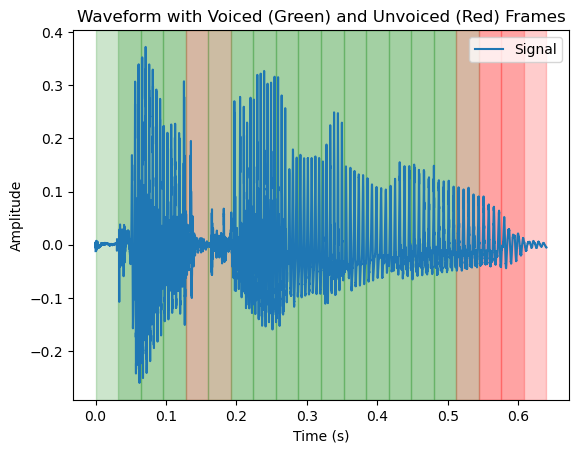

In [6]:
# using autocorrelation
windowSize = 1024 # frames
shiftSize = 512

num_frames = 1 + (len(signal) - windowSize) // shiftSize
voiced_unvoiced = []  # 1 for voiced, 0 for unvoiced
auto_values = []

for i in range(num_frames):
    start = i * shiftSize
    end = start + windowSize
    frame = signal[start:end]
    auto_val = autocorrelation(frame)
        
    auto_values.append(auto_val)
   
threshold = np.percentile(auto_values, 20)  # 20th percentile

for i in range(num_frames):
    if auto_values[i] > threshold:
        voiced_unvoiced.append(1)
    else:
        voiced_unvoiced.append(0)
        
        
plt.figure()
plt.plot(time, signal, label="Waveform")
for i, vu in enumerate(voiced_unvoiced):
    start_time = i * shiftSize / sr
    end_time = (i * shiftSize + windowSize) / sr
    color = 'green' if vu == 1 else 'red'
    plt.axvspan(start_time, end_time, color=color, alpha=0.2)
plt.title("Waveform with Voiced (Green) and Unvoiced (Red) Frames")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(["Signal"])
plt.show()

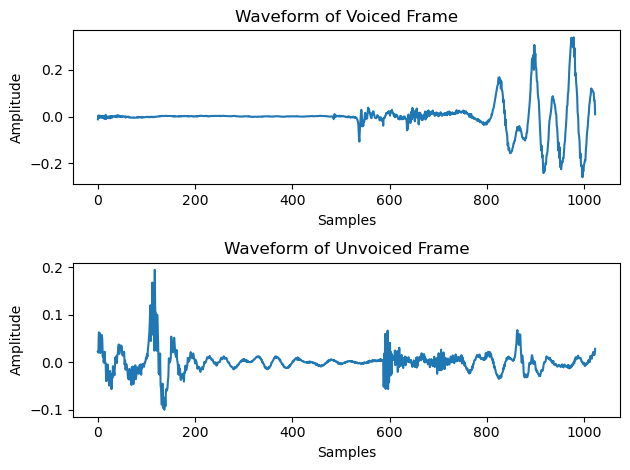

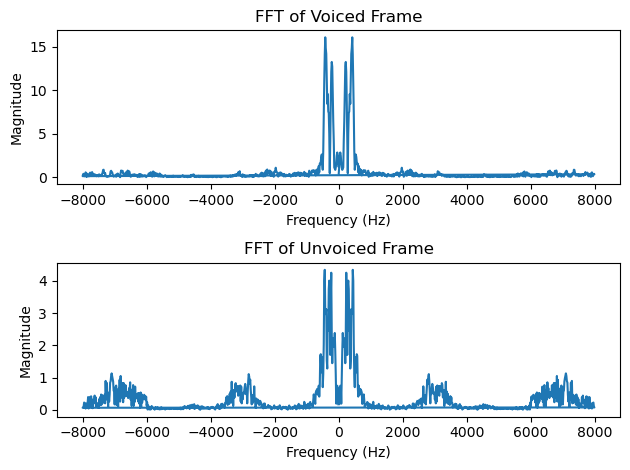

In [7]:
windowSize = 1024 # frames
shiftSize = 512

num_frames = 1 + (len(signal) - windowSize) // shiftSize
voiced_unvoiced = []  # 1 for voiced, 0 for unvoiced
energy_values = []

for i in range(num_frames):
    start = i * shiftSize
    end = start + windowSize
    frame = signal[start:end]
    energy_val = energy(frame)
        
    energy_values.append(energy_val)
   
threshold = np.percentile(energy_values, 20)  # 20th percentile

for i in range(num_frames):
    if energy_values[i] > threshold:
        voiced_unvoiced.append(1)
    else:
        voiced_unvoiced.append(0)

for i, vu in enumerate(voiced_unvoiced):
    if vu == 1:  # Voiced
        voiced_frame = signal[i * shiftSize : i * shiftSize + windowSize]
        break

for i, vu in enumerate(voiced_unvoiced):
    if vu == 0:  # Unvoiced
        unvoiced_frame = signal[i * shiftSize : i * shiftSize + windowSize]
        break


plt.figure()
plt.subplot(2, 1, 1)
plt.plot(voiced_frame)
plt.title("Waveform of Voiced Frame")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(unvoiced_frame)
plt.title("Waveform of Unvoiced Frame")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

voiced_fft = np.abs(np.fft.fft(voiced_frame))
unvoiced_fft = np.abs(np.fft.fft(unvoiced_frame))
frequency_voiced = np.fft.fftfreq(len(voiced_frame), 1/sr)
frequency_unvoiced = np.fft.fftfreq(len(unvoiced_frame), 1/sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(frequency_voiced, voiced_fft)
plt.title("FFT of Voiced Frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(2, 1, 2)
plt.plot(frequency_unvoiced, unvoiced_fft)
plt.title("FFT of Unvoiced Frame")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()
